In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('expert_outreach_metrics_oct_27jan.csv')

In [12]:
# print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5482887 entries, 0 to 5482886
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   project_id         int64  
 1   segment_id         int64  
 2   epl_id             float64
 3   expert_id          float64
 4   employee_id        int64  
 5   outreach_id        object 
 6   source             object 
 7   expert_status      object 
 8   unsubscribe_event  object 
 9   getdate            object 
 10  metric_logged_at   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 460.1+ MB
None


In [6]:
print(df['source'].value_counts())

source
AthenaList       3281546
ProjectInvite    2201341
Name: count, dtype: int64


In [16]:
print(df.isnull().sum())
print(f"percentage of AthenaList with null expert_id {round(863474 / 3281546 * 100, 2)}%")
print(f"percentage of outreaches with null expert_id {round(863474 / 5482887 * 100, 2)}%")

project_id                 0
segment_id                 0
epl_id               3281546
expert_id             863474
employee_id                0
outreach_id                0
source                     0
expert_status              0
unsubscribe_event    5476780
getdate                    0
metric_logged_at           0
dtype: int64
percentage of AthenaList with null expert_id 26.31%
percentage of outreaches with null expert_id 15.75%


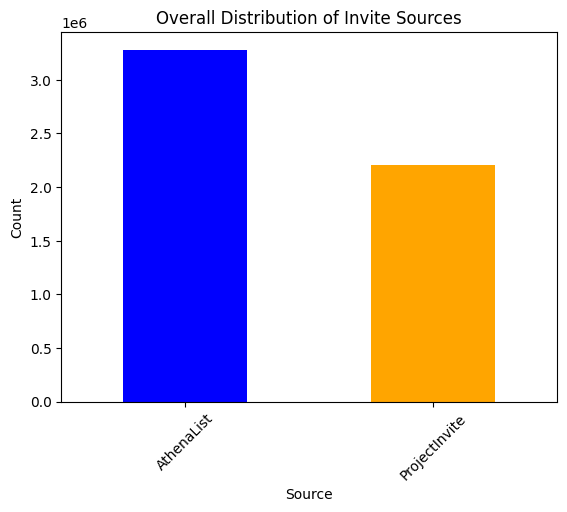

In [10]:
overall_distribution = df['source'].value_counts()

filtered_overall_distribution = overall_distribution.loc[['AthenaList', 'ProjectInvite']]

# print(filtered_overall_distribution)

filtered_overall_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Overall Distribution of Invite Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

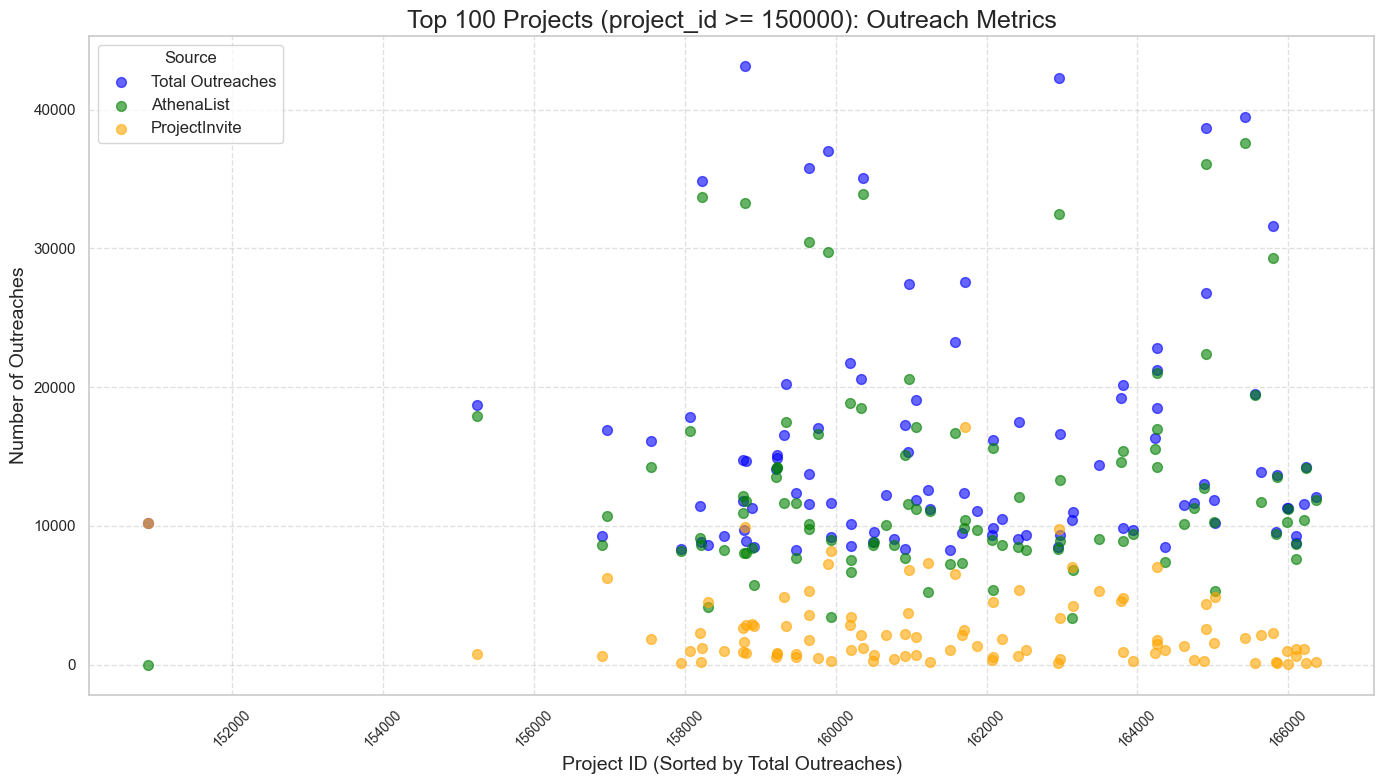

In [12]:
metrics = (
    df.groupby(['project_id', 'source'])
    .size()
    .reset_index(name='count')
    .pivot(index='project_id', columns='source', values='count')
    .fillna(0)
    .reset_index()
)

# Add a column for total outreaches
metrics['total_outreaches'] = metrics.get('AthenaList', 0) + metrics.get('ProjectInvite', 0)

# Filter for projects with project_id >= 150000
metrics = metrics[metrics['project_id'] >= 150000]

# Sort by total outreaches
metrics = metrics.sort_values(by='total_outreaches', ascending=False)

# Limit to top 100 projects
top_projects = metrics.head(100)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Scatter plot for total outreaches
plt.scatter(top_projects['project_id'], top_projects['total_outreaches'], label='Total Outreaches', color='blue', s=50, alpha=0.6)

# Scatter plot for AthenaList outreaches
if 'AthenaList' in top_projects:
    plt.scatter(top_projects['project_id'], top_projects['AthenaList'], label='AthenaList', color='green', s=50, alpha=0.6)

# Scatter plot for ProjectInvite outreaches
if 'ProjectInvite' in top_projects:
    plt.scatter(top_projects['project_id'], top_projects['ProjectInvite'], label='ProjectInvite', color='orange', s=50, alpha=0.6)

# Customize the chart
plt.title('Top 100 Projects (project_id >= 150000): Outreach Metrics', fontsize=18)
plt.xlabel('Project ID (Sorted by Total Outreaches)', fontsize=14)
plt.ylabel('Number of Outreaches', fontsize=14)
plt.legend(title='Source', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

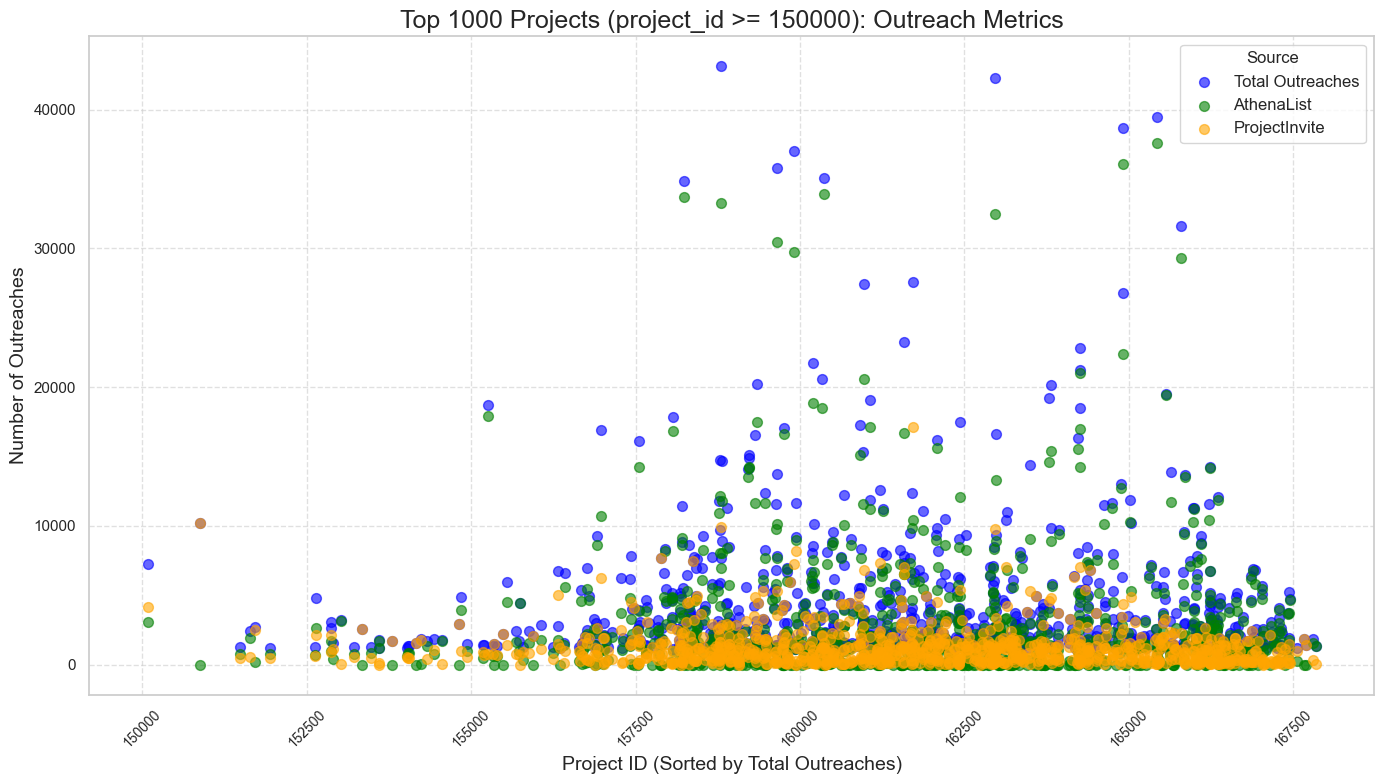

In [13]:
metrics = (
    df.groupby(['project_id', 'source'])
    .size()
    .reset_index(name='count')
    .pivot(index='project_id', columns='source', values='count')
    .fillna(0)
    .reset_index()
)

# Add a column for total outreaches
metrics['total_outreaches'] = metrics.get('AthenaList', 0) + metrics.get('ProjectInvite', 0)

# Filter for projects with project_id >= 150000
metrics = metrics[metrics['project_id'] >= 150000]

# Sort by total outreaches
metrics = metrics.sort_values(by='total_outreaches', ascending=False)

# Limit to top 100 projects
top_projects = metrics.head(1000)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Scatter plot for total outreaches
plt.scatter(top_projects['project_id'], top_projects['total_outreaches'], label='Total Outreaches', color='blue', s=50, alpha=0.6)

# Scatter plot for AthenaList outreaches
if 'AthenaList' in top_projects:
    plt.scatter(top_projects['project_id'], top_projects['AthenaList'], label='AthenaList', color='green', s=50, alpha=0.6)

# Scatter plot for ProjectInvite outreaches
if 'ProjectInvite' in top_projects:
    plt.scatter(top_projects['project_id'], top_projects['ProjectInvite'], label='ProjectInvite', color='orange', s=50, alpha=0.6)

# Customize the chart
plt.title('Top 1000 Projects (project_id >= 150000): Outreach Metrics', fontsize=18)
plt.xlabel('Project ID (Sorted by Total Outreaches)', fontsize=14)
plt.ylabel('Number of Outreaches', fontsize=14)
plt.legend(title='Source', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()